In [1]:
import myutil as mu
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



--- 
 선형 회귀(Linear Regression) 


-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 18.666666 
accuracy : 0.00 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.048171 
accuracy : 0.93 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 0.029767 
accuracy : 0.94 

-------------------------------------------------------------------------------- 
epoch :  300/2000 
cost : 0.018394 
accuracy : 0.96 

-------------------------------------------------------------------------------- 
epoch :  400/2000 
cost : 0.011366 
accuracy : 0.97 

-------------------------------------------------------------------------------- 
epoch :  500/2000 
cost : 0.007024 
accuracy : 0.97 

-------------------------------------------------------------------------------- 
epoch :  600/2000 
cost : 0.004340 
accuracy : 0.98 

-----------------------------------------------

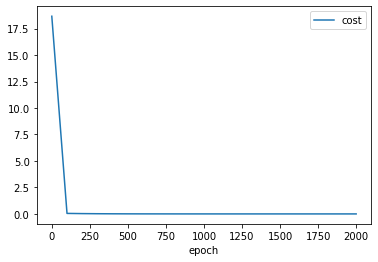

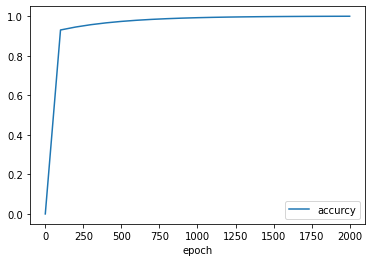


W : 
    torch.Size([1]) tensor([1.9974])

b : 
    torch.Size([1]) tensor([0.0060])



In [2]:

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000  # 원하는만큼 경사 하강법을 반복

mu.plt_init()

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # accuracy 계산
    accuracy = mu.get_regression_accuracy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        mu.log_epoch(epoch, nb_epochs, cost, accuracy)

mu.plt_show()
mu.log("W", W)
mu.log("b", b)



--- 
 optimizer.zero_grad()가 필요한 이유 


In [3]:

import torch

w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    z = 2 * w

    z.backward()
    print('수식을 w로 미분한 값 : {}'.format(w.grad))



수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


--- 
 torch.manual_seed()를 하는 이유 


In [4]:

import torch

torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1, 3):
    print(torch.rand(1))

torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1, 3):
    print(torch.rand(1))

torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1, 3):
    print(torch.rand(1))


랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])
랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])
랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])
